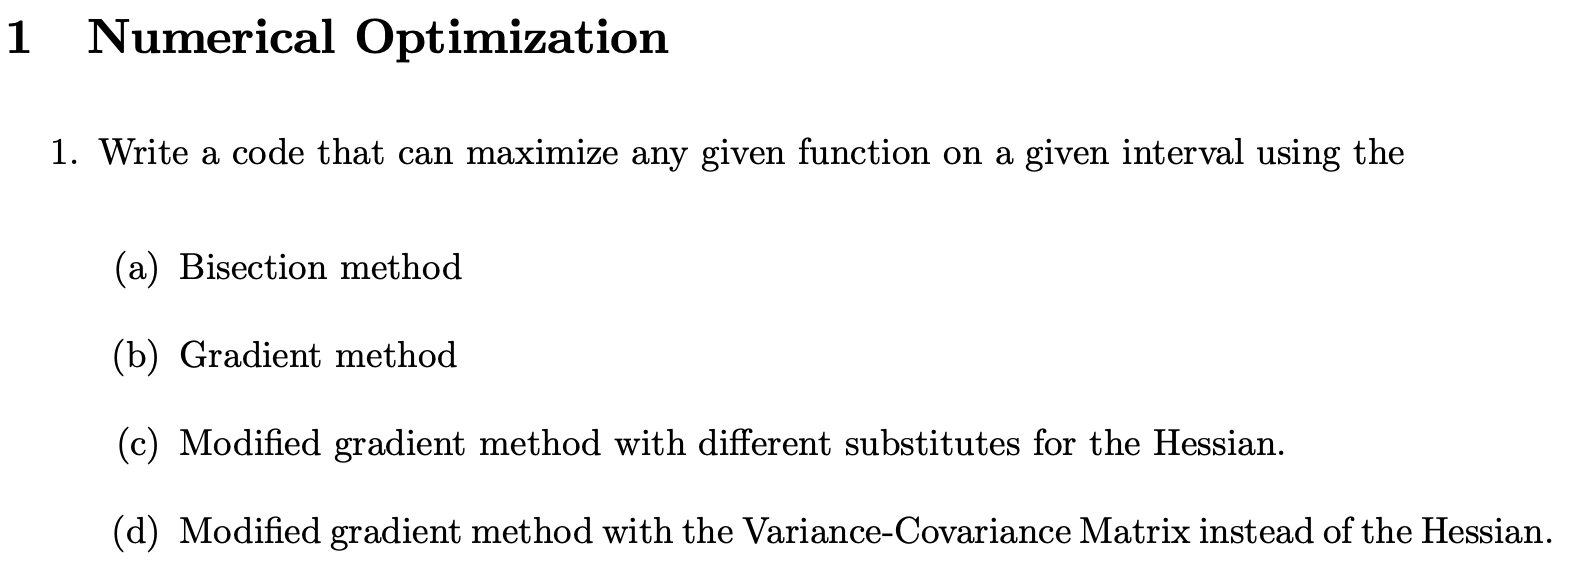

In [1]:
from scipy.misc import derivative
import numpy as np
import numdifftools as nd
from scipy.optimize import minimize

# fd = nd.Derivative(np.exp)  # 1'st derivative
# fdd = nd.Derivative(np.exp, n=2)  # 2'nd derivative
# np.allclose(fd(1), 2.718281)
# g = nd.Gradient(lambda x: np.sum(x ** 2))([1, 2, 3])
# h = nd.Hessian(lambda x: np.sum(x ** 2))([1, 2, 3])

## Bisection method

When can we use Bisection method to find global optimum of a function?

ChatGPT4:
The Bisection method is primarily designed for finding roots of functions, not for optimizing them. It specifically targets finding a point where a function changes sign, which indicates a zero crossing. However, in some special contexts, it can be adapted to find the optimum (maximum or minimum) of a function under specific conditions.

Here’s when you might use a form of the Bisection method to find a global optimum:

1. **Unimodal Functions on an Interval**: If a function is unimodal on a given interval (meaning it has only one local and hence global maximum or minimum in that interval), the Bisection method or a variant of it, like the Golden Section Search (which also divides the function domain into intervals that progressively shrink), can be used. In unimodal functions, once the direction of the optimum is established, halving the interval repeatedly can help converge to the maximum or minimum.

2. **Derivative-Based Bisection for Convex/Concave Functions**: If you can work with the derivative of the function and know that the function is strictly convex or concave, you can use the Bisection method to find where the derivative equals zero, which corresponds to the global minimum or maximum. This method fundamentally uses the Bisection approach on the derivative of the function, looking for a change in sign of the first derivative.

3. **Guaranteed Sign Change Around Optimum**: The classic Bisection method requires a sign change to determine the bracketing of the root. If you modify the problem so that your function’s derivative shows a guaranteed sign change around the maximum or minimum (for example, it’s positive before the maximum and negative after), you could theoretically use the Bisection method on the derivative function to find where it crosses zero, indicating a peak or trough.

4. **Combination with Other Conditions**: When combined with other techniques like interval narrowing based on derivative tests or using other criteria to ensure the function's behavior (such as ensuring the function’s second derivative maintains a consistent sign, which confirms convexity or concavity), the Bisection method can indirectly contribute to finding an optimum.

However, it's crucial to note that the Bisection method itself does not directly find global optima unless adapted or combined with these additional conditions. For general optimization, especially without knowledge about the function’s unimodality or derivative behavior, other optimization methods like gradient descent, Newton-Raphson (for finding zeros of the derivative), or global optimization techniques might be more appropriate and effective.

In [2]:
number_of_steps = 0

def bisection_root_find(g, interval, e=10 ** -15, maxiter=1000):
    global number_of_steps
    maxiter -= 1
    number_of_steps += 1
    m = (interval[0] + interval[1]) / 2
    if (maxiter == 0) or (interval[1] - interval[0] < e):
        return m
    if g(interval[0]) == 0:
        return interval[0]
    if g(interval[1]) == 0:
        return interval[1]
    if g(m) == 0:
        return m
    if g(interval[0]) * g(m) < 0:
        return bisection_root_find(g, (interval[0], m), e, maxiter)
    if g(interval[1]) * g(m) < 0:
        return bisection_root_find(g, (m, interval[1]), e, maxiter)
    return None


nd.Derivative(np.exp)
print(bisection_root_find(g=lambda t: nd.Derivative(lambda x: -1 / x ** 0.5 + -x + 4)(t), interval=(0.1, 6.0)))
print(f'Number of steps: {number_of_steps}')

0.6299605249474285
Number of steps: 54


## Gradient method
**Gradient method**: More commonly known as the Gradient Descent method, is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using Gradient Descent, you take steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. If instead you take steps proportional to the positive of the gradient, you approach a local maximum; this variant is known as Gradient Ascent.

**Newton's Method**: This is one of the most famous optimization algorithms that use the Hessian. Newton's method for optimization uses the Hessian matrix to find the minima or maxima of a function. Unlike Gradient Descent, which only relies on first-order derivatives, Newton's method uses both the gradient and the Hessian matrix to make more informed move decisions. The update rule in Newton's method is:
   
$x_{t+1} = x_t - [\nabla^2 f(x_t)]^{-1} \nabla f(x_t)$


This method can converge faster than Gradient Descent, especially near the optimum, due to its use of second-order information.


In [3]:
number_of_steps = 0

def newton_maximum_find(f, x, e=10 ** -15, maxiter=1000):
    global number_of_steps
    maxiter -= 1
    number_of_steps += 1
    if (maxiter == 0) or np.allclose(f(x), 0.0):
        return x

    g = nd.Gradient(f)(x).reshape(-1)
    h = nd.Hessian(f)(x)
    x_next = x - np.linalg.inv(h) @ g
    if np.allclose(x_next, x, atol=e):
        return x

    return newton_maximum_find(f, x_next, e, maxiter)


print(newton_maximum_find(f=lambda x: -1 / x ** 0.5 + -x + 4, x=1.0))
print(f'Number of steps: {number_of_steps}')

number_of_steps = 0
print(newton_maximum_find(f=lambda x: -x[0] ** 2 - x[1] ** 2 - x[0] * x[1], x=[1.0, 1.0]))
print(f'Number of steps: {number_of_steps}')

[0.62996052]
Number of steps: 7
[6.66133815e-16 6.66133815e-16]
Number of steps: 2


## Modified gradient method with different substitutes for the Hessian
Here we use I instead of H.

In [4]:
number_of_steps = 0

def gradient_descent_maximum_find(f, x, e=10 ** -10, maxiter=1000):
    global number_of_steps
    maxiter -= 1
    number_of_steps += 1
    if (maxiter == 0) or np.allclose(f(x), 0.0):
        return x

    g = nd.Gradient(f)(x)
    x_next = x + g * 0.5

    if np.allclose(x_next, x, atol=e):
        return x
    return gradient_descent_maximum_find(f, x_next, e, maxiter)


print(gradient_descent_maximum_find(f=lambda x: -1 / x ** 0.5 + -x + 4, x=1.0))
print(f'Number of steps: {number_of_steps}')

number_of_steps = 0
print(gradient_descent_maximum_find(f=lambda x: -x[0] ** 2 - x[1] ** 2 - x[0] * x[1], x=[1.0, 1.0]))
print(f'Number of steps: {number_of_steps}')

0.629959348621679
Number of steps: 8
[-3.05175781e-05 -3.05175781e-05]
Number of steps: 16


## Modified gradient method with the Variance-Covariance Matrix instead of the Hessian
We can not use this method for normal(?) functions, so we use it in the next part (in the last cell)

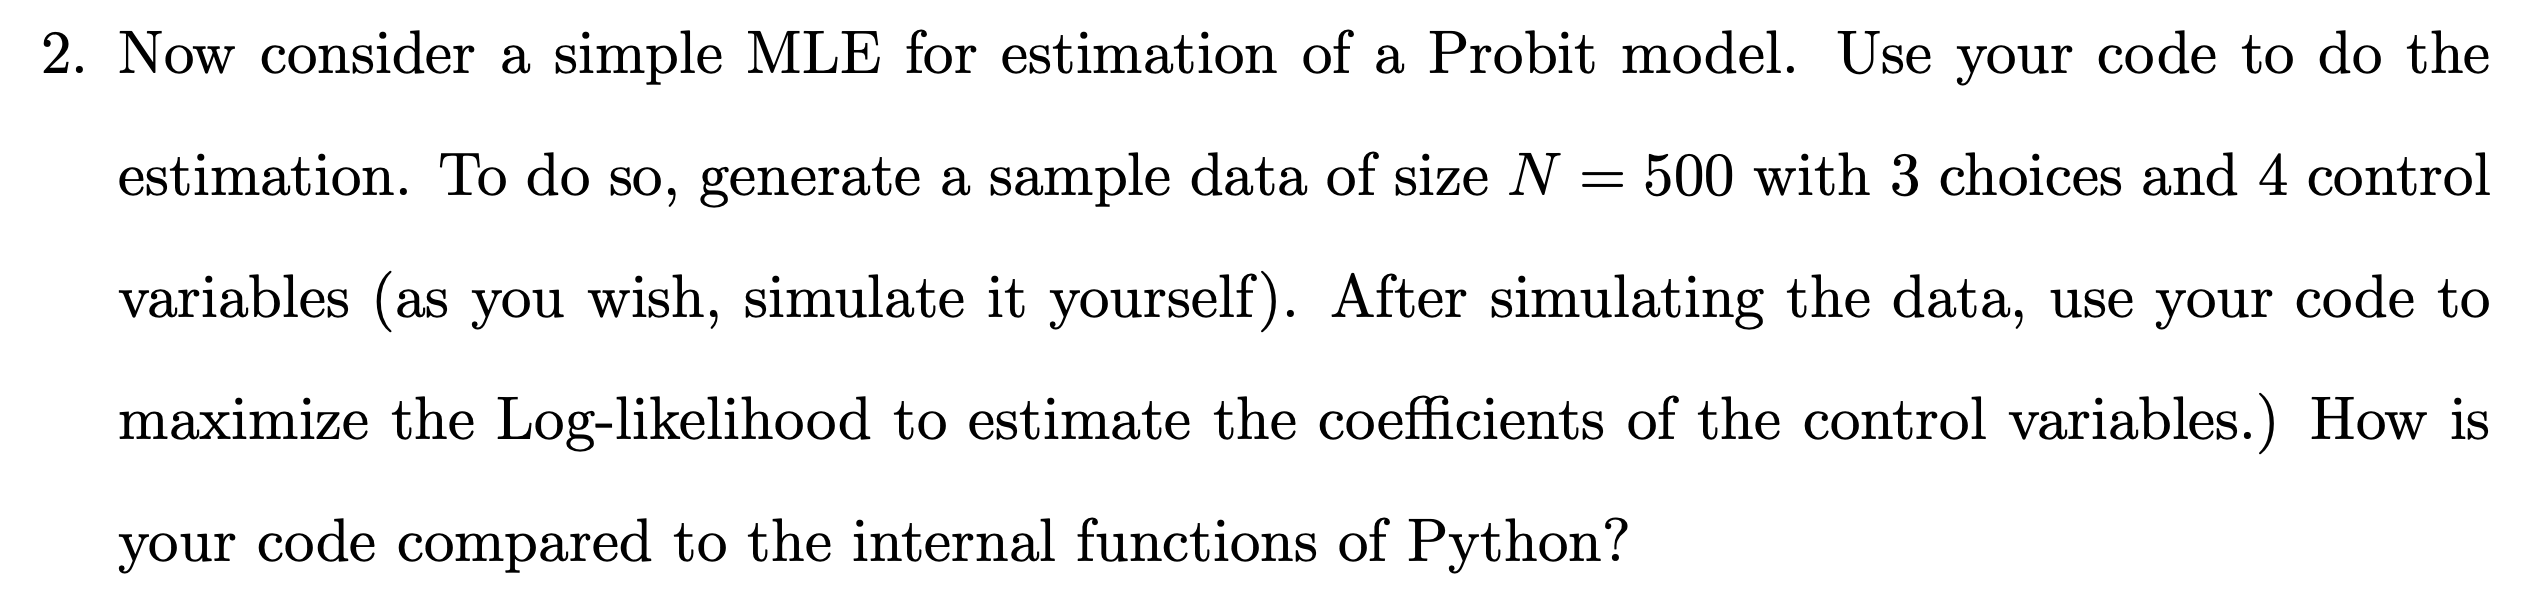

In [5]:
import statsmodels as sm
import statsmodels.api as sm
import statsmodels as sm

## Generate Data

In [6]:
%%time
N = 2_000
N_CONTROL = 4
betta_0 = np.array([1.5, 2.5, -1.5, -2]).reshape((-1, 1))

sigma = 1  # σ
np.random.seed(1391)
X1 = np.random.normal(3, 1, (N, N_CONTROL)) @ np.random.uniform(low=-1, high=+1, size=(N_CONTROL, N_CONTROL))
X2 = np.random.normal(3, 1, (N, N_CONTROL))  # @ np.random.uniform(low=-1, high=+1, size=(N_CONTROL, N_CONTROL))
X3 = np.random.normal(3, 1, (N, N_CONTROL))  # @ np.random.uniform(low=-1, high=+1, size=(N_CONTROL, N_CONTROL))

U1 = X1 @ betta_0 + np.random.normal(0, sigma, (N, 1))
U2 = X2 @ betta_0 + np.random.normal(0, sigma, (N, 1))
U3 = X3 @ betta_0 + np.random.normal(0, sigma, (N, 1))

Y1 = ((U1 >= U2) & (U1 >= U3)) * 1
Y2 = ((U1 < U2) & (U2 >= U3)) * 1
Y3 = ((U1 < U3) & (U2 < U3)) * 1

R = 500
RANDOM_NORMAL_1 = np.random.normal(0, 1, size=(3, N, R))

CPU times: user 89.9 ms, sys: 8.1 ms, total: 98 ms
Wall time: 96.5 ms


In [7]:
def simulated_p(theta):
    betta, sigma = np.array(theta[:-1]).reshape((-1, 1)), theta[-1]

    epsilon = sigma * RANDOM_NORMAL_1
    U1 = X1 @ betta + epsilon[0]
    U2 = X2 @ betta + epsilon[1]
    U3 = X3 @ betta + epsilon[2]

    p1 = ((U1 >= U2) & (U1 >= U3)).mean(axis=-1).reshape(N, 1)
    p2 = ((U1 < U2) & (U2 >= U3)).mean(axis=-1).reshape(N, 1)
    p3 = ((U1 < U3) & (U2 < U3)).mean(axis=-1).reshape(N, 1)
    return p1, p2, p3


def simulated_ll(theta):
    sp1, sp2, sp3 = simulated_p(theta)
    l = sp1 * Y1 + sp2 * Y2 + sp3 * Y3
    l = np.where(l == 0, 1e-9, l)
    return - np.log(l).sum()

## Using Python minimizer

In [8]:
%%time
theta0 = np.array([1, 1, -1, -1, 1.0])
result = minimize(simulated_ll, theta0,
                  bounds=[(0, 2), (0, 3), (-2, 0), (-3, -1), (1.0, 1.0)], method='Nelder-Mead')
print(f'MSLE: {result.x[:-1]}')
print(f'True Betta: {betta_0.reshape(-1)}')

MSLE: [ 1.59627238  2.54553578 -1.53124307 -1.98648041]
True Betta: [ 1.5  2.5 -1.5 -2. ]
CPU times: user 4.65 s, sys: 838 ms, total: 5.49 s
Wall time: 5.49 s


## Using gradient_descent_maximum_find function

In [10]:
%%time
number_of_steps = 0

def gradient_descent_maximum_find(f, x, e=10 ** -5, maxiter=1000):
    global number_of_steps
    maxiter -= 1
    number_of_steps += 1
    if (maxiter == 0) or np.allclose(f(x), 0.0):
        return x

    g = nd.Gradient(f)(x)
    x_next = x + g * 0.003
    print(x_next)

    if np.allclose(x_next, x, atol=e):
        return x
    return gradient_descent_maximum_find(f, x_next, e, maxiter)


# IMPORTANT: -simulated_ll not simulated_ll
result = gradient_descent_maximum_find(f=lambda x: -simulated_ll(np.array([*x, 1.0])), x=[1, 1, -1, -1], maxiter=10)
print(number_of_steps)
print(f'MSLE: {result}')
print(f'True Betta: {betta_0.reshape(-1)}')

[ 0.87161813  1.83685151 -0.8160576  -1.02864158]
[ 1.0523465   1.51854068 -1.11970963 -1.49444936]
[ 1.43279447  2.09495574 -1.17654174 -0.86792999]
[ 1.17683979  1.88402292 -1.20799875 -1.76785162]
[ 1.53192645  2.27013755 -1.30339622 -1.15821322]
[ 1.23123366  2.07979216 -1.26655312 -1.9032732 ]
[ 1.60860247  2.37424631 -1.46329648 -1.33219449]
[ 1.35908409  2.32018809 -1.35594096 -1.92966868]
[ 1.56557761  2.36726269 -1.49753368 -1.63871382]
10
MSLE: [ 1.56557761  2.36726269 -1.49753368 -1.63871382]
True Betta: [ 1.5  2.5 -1.5 -2. ]
CPU times: user 18.8 s, sys: 3.36 s, total: 22.2 s
Wall time: 22.2 s


## gradient_descent for-loop implementation

In [13]:
%%time
theta = np.array([1, 1, -1, -1, 1.0])
betta, sigma = np.array(theta[:-1]).reshape((-1, 1)), theta[-1]
epsilon = sigma * RANDOM_NORMAL_1
step = 1.0

for t in range(500):
    U1 = X1 @ betta + epsilon[0]
    U2 = X2 @ betta + epsilon[1]
    U3 = X3 @ betta + epsilon[2]

    sp1 = ((U1 >= U2) & (U1 >= U3)).mean(axis=-1).reshape(N, 1)
    sp2 = ((U1 < U2) & (U2 >= U3)).mean(axis=-1).reshape(N, 1)
    sp3 = ((U1 < U3) & (U2 < U3)).mean(axis=-1).reshape(N, 1)

    l = sp1 * Y1 + sp2 * Y2 + sp3 * Y3
    l = np.where(l == 0, 1e-9, l)
    ll = np.log(l)

    s = []

    E = 0.0001
    for i in range(betta.shape[0]):
        betta_prime = betta.copy()
        betta_prime[i] += E

        U1_prime = X1 @ betta_prime + epsilon[0]
        U2_prime = X2 @ betta_prime + epsilon[1]
        U3_prime = X3 @ betta_prime + epsilon[2]

        sp1_prime = ((U1_prime >= U2_prime) & (U1_prime >= U3_prime)).mean(axis=-1).reshape(N, 1)
        sp2_prime = ((U1_prime < U2_prime) & (U2_prime >= U3_prime)).mean(axis=-1).reshape(N, 1)
        sp3_prime = ((U1_prime < U3_prime) & (U2_prime < U3_prime)).mean(axis=-1).reshape(N, 1)

        l_prime = sp1_prime * Y1 + sp2_prime * Y2 + sp3_prime * Y3
        l_prime = np.where(l_prime == 0, 1e-9, l_prime)
        ll_prime = np.log(l_prime)
        s.append((ll_prime - ll) / E)
        
    s = np.hstack(s)
    g = s.mean(0).reshape(-1, 1)
    betta = betta + g * step
    
    step *= 0.99
    
    if t % 50 == 0:
        print(betta.reshape(-1))

print(f'MSLE: {betta.reshape(-1)}')
print(f'True Betta: {betta_0.reshape(-1)}')

[ 0.87908909  1.03718656 -0.96613448 -1.08771187]
[ 1.20600471  2.17173954 -1.50039773 -1.68788543]
[ 1.46890219  2.37516087 -1.42265958 -1.84806849]
[ 1.54769947  2.40382139 -1.27097669 -1.67715016]
[ 1.38043123  2.32844241 -1.39604688 -1.80447487]
[ 1.47738531  2.36590274 -1.36068231 -1.75938425]
[ 1.47927824  2.31909648 -1.39142642 -1.83232235]
[ 1.46273452  2.30764931 -1.39691278 -1.82908921]
[ 1.4584093   2.30333841 -1.38946373 -1.81486048]
[ 1.46124956  2.30799569 -1.38820884 -1.81291236]
MSLE: [ 1.45467241  2.30491817 -1.39241658 -1.81664154]
True Betta: [ 1.5  2.5 -1.5 -2. ]
CPU times: user 29.8 s, sys: 112 ms, total: 30 s
Wall time: 30 s


## Variance-Covariance Matrix for-loop implementation

In [14]:
%%time
theta = np.array([1, 1, -1, -1, 1.0])
betta, sigma = np.array(theta[:-1]).reshape((-1, 1)), theta[-1]
epsilon = sigma * RANDOM_NORMAL_1
step = 0.3

for t in range(500):
    U1 = X1 @ betta + epsilon[0]
    U2 = X2 @ betta + epsilon[1]
    U3 = X3 @ betta + epsilon[2]

    sp1 = ((U1 >= U2) & (U1 >= U3)).mean(axis=-1).reshape(N, 1)
    sp2 = ((U1 < U2) & (U2 >= U3)).mean(axis=-1).reshape(N, 1)
    sp3 = ((U1 < U3) & (U2 < U3)).mean(axis=-1).reshape(N, 1)

    l = sp1 * Y1 + sp2 * Y2 + sp3 * Y3
    l = np.where(l == 0, 1e-9, l)
    ll = np.log(l)

    s = []

    for i in range(betta.shape[0]):
        betta_prime = betta.copy()
        betta_prime[i] += 0.0001

        U1_prime = X1 @ betta_prime + epsilon[0]
        U2_prime = X2 @ betta_prime + epsilon[1]
        U3_prime = X3 @ betta_prime + epsilon[2]

        sp1_prime = ((U1_prime >= U2_prime) & (U1_prime >= U3_prime)).mean(axis=-1).reshape(N, 1)
        sp2_prime = ((U1_prime < U2_prime) & (U2_prime >= U3_prime)).mean(axis=-1).reshape(N, 1)
        sp3_prime = ((U1_prime < U3_prime) & (U2_prime < U3_prime)).mean(axis=-1).reshape(N, 1)

        l_prime = sp1_prime * Y1 + sp2_prime * Y2 + sp3_prime * Y3
        l_prime = np.where(l_prime == 0, 1e-9, l_prime)
        ll_prime = np.log(l_prime)
        s.append((ll_prime - ll) / 0.0001)
        
    s = np.hstack(s)
    g = s.mean(0).reshape(-1, 1)
    B = s.T @ s / N # Cov Matrix

    try:
        betta = betta + np.linalg.inv(B) @ g * step
    except:
        print('Singular')
        betta = betta + g * step

    if t % 50 == 0:
        print(betta.reshape(-1))

print(f'MSLE: {betta.reshape(-1)}')
print(f'True Betta: {betta_0.reshape(-1)}')

[ 0.99662563  1.00225889 -0.99945509 -1.00441905]
[ 1.03195147  1.30941048 -1.09170983 -1.13918298]
[ 1.05792565  1.52173254 -1.1541268  -1.27251486]
[ 1.1272551   1.7422218  -1.23680691 -1.40788295]
[ 1.25131925  1.91767303 -1.28514499 -1.51299961]
[ 1.36842658  2.07491055 -1.36637397 -1.60769234]
[ 1.38667724  2.17827806 -1.41082369 -1.66291538]
[ 1.43204411  2.30219911 -1.50317904 -1.7619386 ]
[ 1.49804037  2.49756271 -1.57614802 -1.87454506]
[ 1.53479165  2.61818955 -1.6395321  -1.94960027]
MSLE: [ 1.61835849  2.70773183 -1.68605577 -2.02573942]
True Betta: [ 1.5  2.5 -1.5 -2. ]
CPU times: user 1min 21s, sys: 24.3 s, total: 1min 45s
Wall time: 26.7 s


### Comparison
python minimizer is both faster and more accurate.